# 준비 - 구글드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
path = "titanic/"
os.listdir(path)

FileNotFoundError: ignored

# STEP 1 - 분류모델 만들기

## 데이터 준비

In [ ]:
import pandas as pd
import numpy as np

### 원본 데이터 로드

In [ ]:
df = pd.read_csv(os.path.join(path, "titanic.csv"))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 분석 컬럼 선택

In [ ]:
X_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',  'Embarked']
y_col = 'Survived'

### 모델 입력 데이터

In [ ]:
input_data = df[X_cols + [y_col]].copy()
input_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,S,0
887,1,female,19.0,0,0,S,1
888,3,female,NaN,1,2,S,0
889,1,male,26.0,0,0,C,1


### 결측치 제거

머신러닝 모델은 결측치(Null 값)을 입력으로 받지 못한다

결측치 처리 필수!!



결측치 있는 컬럼 검색

In [ ]:
input_data.columns[input_data.isna().any()].tolist()

['Age', 'Embarked']

Embarked 결측치 있는 행 확인해보기

In [ ]:
input_data[input_data['Embarked'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
61,1,female,38.0,0,0,NaN,1
829,1,female,62.0,0,0,NaN,1


Age 결측치 있는 행 확인해보기

In [ ]:
input_data[input_data['Age'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
5,3,male,NaN,0,0,Q,0
17,2,male,NaN,0,0,S,1
19,3,female,NaN,0,0,C,1
26,3,male,NaN,0,0,C,0
28,3,female,NaN,0,0,Q,1
...,...,...,...,...,...,...,...
859,3,male,NaN,0,0,C,0
863,3,female,NaN,8,2,S,0
868,3,male,NaN,0,0,S,0
878,3,male,NaN,0,0,S,0


결측치 있는 행은 모두 제거

In [ ]:
input_data = input_data.dropna(axis=0).copy()

결측치 있는 컬럼 제거 되었는지 확인

In [ ]:
input_data.columns[input_data.isna().any()].tolist()

[]

### 정수 인코딩

모든 모델 입력은 숫자 형태여야 한다

In [ ]:
input_data['Sex'] = input_data['Sex'].replace({'female': 0, 'male':1 })
input_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,22.0,1,0,S,0
1,1,0,38.0,1,0,C,1
2,3,0,26.0,0,0,S,1
3,1,0,35.0,1,0,S,1
4,3,1,35.0,0,0,S,0
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,Q,0
886,2,1,27.0,0,0,S,0
887,1,0,19.0,0,0,S,1
889,1,1,26.0,0,0,C,1


In [ ]:
input_data['Embarked'] = input_data['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2})
input_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,22.0,1,0,2,0
1,1,0,38.0,1,0,0,1
2,3,0,26.0,0,0,2,1
3,1,0,35.0,1,0,2,1
4,3,1,35.0,0,0,2,0
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,1,0
886,2,1,27.0,0,0,2,0
887,1,0,19.0,0,0,2,1
889,1,1,26.0,0,0,0,1


### 데이터 Split

- 모델 학습용
  - Train Data
  - Validation Data
- 모델 평가용
  - Test Data

In [ ]:
from sklearn.model_selection import train_test_split

trval_X, test_X, trval_y, test_y = train_test_split(
    input_data[X_cols], input_data[y_col],
    test_size=0.2, shuffle=True, stratify=input_data[y_col], random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(
    trval_X, trval_y, test_size=0.2, stratify=trval_y, shuffle=True, random_state=42)

In [ ]:
train_X = np.array(train_X)
train_y = np.array(train_y)
valid_X = np.array(valid_X)
valid_y = np.array(valid_y)
test_X = np.array(test_X)
test_y = np.array(test_y)

In [ ]:
print(len(train_X))
print(len(valid_X))
print(len(test_X))
len(train_X) + len(valid_X) + len(test_X)

455
114
143


712

In [ ]:
from tensorflow.keras.utils import to_categorical

train_y_onehot = to_categorical(train_y)
valid_y_onehot = to_categorical(valid_y)

In [ ]:
train_y_onehot

## 모델 학습

### 모델 정의

In [ ]:
n_features = len(X_cols)
n_features

In [ ]:
n_ 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_model():
    model = Sequential()
    model.add(Dense(units=24, activation="relu", input_dim=4))
    model.add(Dense(units=24, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=12, activation="relu"))
    model.add(Dense(units=12, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=6, activation="relu"))
    model.add(Dense(units=3, activation="softmax"))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

### 모델 학습

Train 데이터, Valid 데이터 입력해서 모델 학습

In [ ]:
model_xgb.fit(train_X, train_y, eval_set=[(valid_X, valid_y)])

[0]	validation_0-error:0.210526
[1]	validation_0-error:0.192982
[2]	validation_0-error:0.210526
[3]	validation_0-error:0.192982
[4]	validation_0-error:0.210526
[5]	validation_0-error:0.192982
[6]	validation_0-error:0.192982
[7]	validation_0-error:0.192982
[8]	validation_0-error:0.192982
[9]	validation_0-error:0.201754
[10]	validation_0-error:0.192982
[11]	validation_0-error:0.192982
[12]	validation_0-error:0.192982
[13]	validation_0-error:0.175439
[14]	validation_0-error:0.175439
[15]	validation_0-error:0.105263
[16]	validation_0-error:0.157895
[17]	validation_0-error:0.096491
[18]	validation_0-error:0.096491
[19]	validation_0-error:0.096491
[20]	validation_0-error:0.096491
[21]	validation_0-error:0.096491
[22]	validation_0-error:0.096491
[23]	validation_0-error:0.096491
[24]	validation_0-error:0.096491
[25]	validation_0-error:0.096491
[26]	validation_0-error:0.096491
[27]	validation_0-error:0.096491
[28]	validation_0-error:0.114035
[29]	validation_0-error:0.114035
[30]	validation_0-er

XGBClassifier()

## 모델 평가

학습한 모델에 test_X 데이터 입력  
입력한 값들에 대한 예측한 y값을 반환한다

In [ ]:
test_X[:4]

array([[ 1.,  0., 24.,  0.,  0.,  0.],
       [ 1.,  0., 54.,  1.,  0.,  0.],
       [ 1.,  1., 52.,  1.,  1.,  2.],
       [ 1.,  0., 18.,  2.,  2.,  0.]])

In [ ]:
test_y[:4]

array([1, 1, 0, 1])

In [ ]:
pred_y_xgb = model_xgb.predict(test_X)
pred_y_xgb

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

얼마나 정확하게 예측하는지 평가 점수 구하기

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_y_xgb))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        80
           1       0.80      0.70      0.75        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



## 최종 모델 저장

In [ ]:
import pickle

with open(os.path.join(path, "model_xgb_clf.pickle"), 'wb') as f:
    pickle.dump(model_xgb, f, pickle.HIGHEST_PROTOCOL)

# STEP 2. 모델 사용하기

## 개발한 모델 로드

In [ ]:
import pickle

with open(os.path.join(path, "model_xgb_clf.pickle"), 'rb') as f:
    model_xgb = pickle.load(f)

모델 잘 불러왔는지 샘플 입력으로 체크

In [ ]:
model_xgb.predict([1, 0, 22, 1, 0, 2])

array([1])

## 모델 사용해 생존 예측

In [ ]:
def predict_survived(param):
    sex_encoded = {'여자': 0, '남자': 1}
    embarked_encoded = {'셰르부르 탑승': 0, '퀸즈타운 탑승': 1, '사우샘프턴 탑승': 2}

    param['성별'] = sex_encoded[param['성별']]
    param['탑승지'] = embarked_encoded[param['탑승지']]
    X = list(param.values())
    
    survived = model_xgb.predict(X)[0]
    survived_text = '생존' if survived == 1 else '사망'
    print(f"예상 생존여부는 {survived_text} 입니다.")

In [ ]:
param = {
    '객실등급'       : 3,
    '성별'           : '남자',
    '나이'           : 22,
    '동승자매/배우수': 1,
    '동승부모/자녀수': 0,
    '탑승지'         : '사우샘프턴 탑승'
}  # 인덱스 0 (첫번째 행) 데이터

predict_survived(param)

[3, 1, 22, 1, 0, 2]
예상 생존여부는 사망 입니다.


In [ ]:
param = {
    '객실등급'       : 1,
    '성별'           : '여자',
    '나이'           : 38,
    '동승자매/배우수': 1,
    '동승부모/자녀수': 0,
    '탑승지'         : '셰르부르 탑승'
}  # 인덱스 1 (2번째 행) 데이터

predict_survived(param)

[1, 0, 38, 1, 0, 0]
예상 생존여부는 생존 입니다.


(예측할 때 참조위한 input_data)

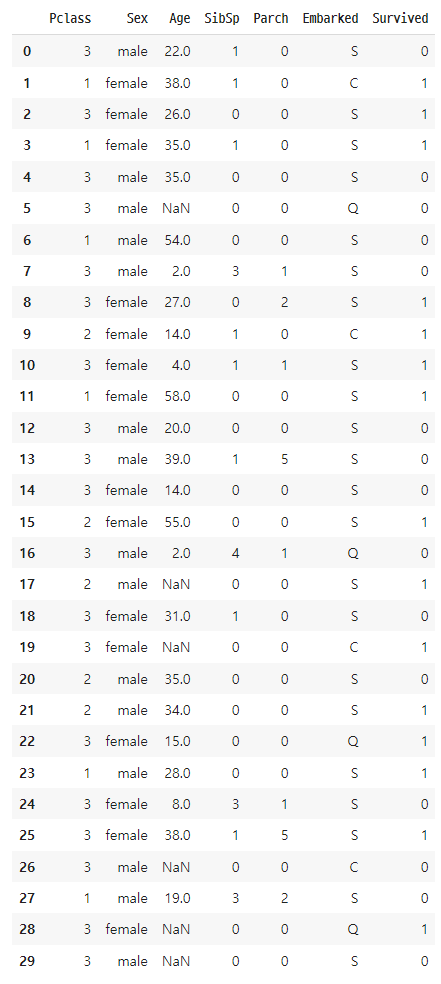